In [1]:
import pandas as pd
from IPython.display import display

In [2]:
red_wine = pd.read_csv('./red-wine.csv')
red_wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [16]:
df_train = red_wine.sample(frac=0.7, random_state=0)
df_valid = red_wine.drop(df_train.index)


max_ = df_train.max(axis=0)
min_ = df_train.min(axis=0)
max_

fixed acidity            15.9000
volatile acidity          1.5800
citric acid               0.7900
residual sugar           13.9000
chlorides                 0.6110
free sulfur dioxide      72.0000
total sulfur dioxide    289.0000
density                   1.0032
pH                        3.9000
sulphates                 1.9800
alcohol                  14.9000
quality                   8.0000
dtype: float64

In [22]:
df_train = (df_train - min_) / (max_ - min_)
df_valid = (df_valid - min_) / (max_ - min_)


In [23]:
X_train = df_train.drop('quality', axis=1)
X_valid = df_valid.drop('quality', axis=1)
y_train = df_train['quality']
y_valid = df_valid['quality']

In [24]:
X_train.shape

(1119, 11)

In [25]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(512, activation='relu', input_shape=[11]),
    layers.Dense(512, activation='relu'),
    layers.Dense(512, activation='relu'),
     layers.Dense(1),
])

2023-05-05 14:12:49.368003: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-05 14:12:49.639545: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-05-05 14:12:49.639573: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-05-05 14:12:50.496274: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-

In [26]:
model.compile(
    optimizer='adam',
    loss='mae'
)

In [27]:
history = model.fit(
    X_train, y_train, validation_data=(X_valid, y_valid), batch_size=256, epochs=10,
)

Epoch 1/10
5/5 [==============================] - 1s 72ms/step - loss: 0.3101 - val_loss: 0.1389
Epoch 2/10
5/5 [==============================] - 0s 25ms/step - loss: 0.1528 - val_loss: 0.1433
Epoch 3/10
5/5 [==============================] - 0s 24ms/step - loss: 0.1294 - val_loss: 0.1335
Epoch 4/10
5/5 [==============================] - 0s 25ms/step - loss: 0.1268 - val_loss: 0.1307
Epoch 5/10
5/5 [==============================] - 0s 25ms/step - loss: 0.1169 - val_loss: 0.1102
Epoch 6/10
5/5 [==============================] - 0s 23ms/step - loss: 0.1135 - val_loss: 0.1117
Epoch 7/10
5/5 [==============================] - 0s 25ms/step - loss: 0.1079 - val_loss: 0.1028
Epoch 8/10
5/5 [==============================] - 0s 25ms/step - loss: 0.1060 - val_loss: 0.1081
Epoch 9/10
5/5 [==============================] - 0s 28ms/step - loss: 0.1040 - val_loss: 0.1016
Epoch 10/10
5/5 [==============================] - 0s 26ms/step - loss: 0.1021 - val_loss: 0.1079


<AxesSubplot:>

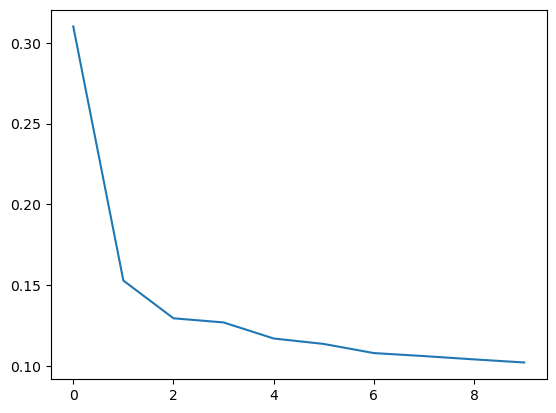

In [31]:
history_df = pd.DataFrame(history.history)
history_df['loss'].plot()

In [32]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
plt.rc('figure', autolayout=True)
plt.rc('axes', labelweight='bold', labelsize='large',
       titleweight='bold', titlesize=18, titlepad=10)
plt.rc('animation', html='html5')

In [33]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.model_selection import train_test_split

In [34]:
fuel = pd.read_csv('./fuel.csv')
fuel

,EngDispl,NumCyl,Transmission,FE,AirAspirationMethod,NumGears,TransLockup,TransCreeperGear,DriveDesc,IntakeValvePerCyl,ExhaustValvesPerCyl,CarlineClassDesc,VarValveTiming,VarValveLift
0,4.7,8,AM6,28.0198,NaturallyAspirated,6,1,0,TwoWheelDriveRear,2,2,2Seaters,1,0
1,4.7,8,M6,25.6094,NaturallyAspirated,6,1,0,TwoWheelDriveRear,2,2,2Seaters,1,0
2,4.2,8,M6,26.8000,NaturallyAspirated,6,1,0,AllWheelDrive,2,2,2Seaters,1,0
3,4.2,8,AM6,25.0451,NaturallyAspirated,6,1,0,AllWheelDrive,2,2,2Seaters,1,0
4,5.2,10,AM6,24.8000,NaturallyAspirated,6,0,0,AllWheelDrive,2,2,2Seaters,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1102,3.2,6,S6,30.4926,NaturallyAspirated,6,1,0,AllWheelDrive,2,2,SpecialPurposeVehicleSUV4WD,1,0
1103,3.0,6,S6,29.7892,Turbocharged,6,1,0,AllWheelDrive,2,2,SpecialPurposeVehicleSUV4WD,1,0
1104,3.2,6,S6,30.4926,NaturallyAspirated,6,1,0,AllWheelDrive,2,2,SpecialPurposeVehicleSUV4WD,1,0
1105,3.2,6,S6,29.7431,NaturallyAspirated,6,1,0,AllWheelDrive,2,2,SpecialPurposeVehicleSUV4WD,1,0


In [38]:
X = fuel.copy()
y = X.pop('FE')

preprocessor = make_column_transformer(
    (StandardScaler(), make_column_selector(dtype_include=np.number)),
    (OneHotEncoder(sparse=False), make_column_selector(dtype_include=object)),
)

X = preprocessor.fit_transform(X)
y = np.log(y)

input_shape = [X.shape[1]]
print('Input shape: {}'.format(input_shape))

Input shape: [50]


In [40]:
pd.DataFrame(X[:10, :])

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,0.913643,1.068005,0.524148,0.685653,-0.226455,0.391659,0.43492,0.463841,-0.447941,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.913643,1.068005,0.524148,0.685653,-0.226455,0.391659,0.43492,0.463841,-0.447941,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.530594,1.068005,0.524148,0.685653,-0.226455,0.391659,0.43492,0.463841,-0.447941,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.530594,1.068005,0.524148,0.685653,-0.226455,0.391659,0.43492,0.463841,-0.447941,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.296693,2.120794,0.524148,-1.458464,-0.226455,0.391659,0.43492,0.463841,-0.447941,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,1.296693,2.120794,0.524148,-1.458464,-0.226455,0.391659,0.43492,0.463841,-0.447941,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,-1.154823,-1.037573,0.524148,-1.458464,-0.226455,0.391659,0.43492,0.463841,-0.447941,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,1.909572,3.173583,0.524148,-1.458464,-0.226455,0.391659,0.43492,0.463841,-0.447941,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,-0.388724,0.015216,0.524148,0.685653,-0.226455,0.391659,0.43492,0.463841,2.232439,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,-0.388724,0.015216,0.524148,-1.458464,-0.226455,0.391659,0.43492,0.463841,2.232439,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [41]:
model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=input_shape),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(1),
])

In [50]:
model.compile(
optimizer = 'adam',
loss = 'mae',
)

In [51]:
history = model.fit(X, y, batch_size=128, epochs=200)

Epoch 1/200
9/9 [==============================] - 1s 4ms/step - loss: 2.6700
Epoch 2/200
9/9 [==============================] - 0s 4ms/step - loss: 0.9816
Epoch 3/200
9/9 [==============================] - 0s 4ms/step - loss: 0.5891
Epoch 4/200
9/9 [==============================] - 0s 4ms/step - loss: 0.3516
Epoch 5/200
9/9 [==============================] - 0s 4ms/step - loss: 0.2383
Epoch 6/200
9/9 [==============================] - 0s 4ms/step - loss: 0.1844
Epoch 7/200
9/9 [==============================] - 0s 4ms/step - loss: 0.1503
Epoch 8/200
9/9 [==============================] - 0s 4ms/step - loss: 0.1203
Epoch 9/200
9/9 [==============================] - 0s 5ms/step - loss: 0.1008
Epoch 10/200
9/9 [==============================] - 0s 4ms/step - loss: 0.0908
Epoch 11/200
9/9 [==============================] - 0s 3ms/step - loss: 0.0793
Epoch 12/200
9/9 [==============================] - 0s 3ms/step - loss: 0.0717
Epoch 13/200
9/9 [==============================] - 0s 3ms/st